In [15]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Example of loading data into a pandas DataFrame (replace with your actual data loading)
df = pd.read_csv('data/tmp/encoded_train.csv')
test_df = pd.read_csv('data/tmp/encoded_test.csv')

# Display the first few rows of the dataframe
df.head()


,Day,Month,Hour,Minute,Night,Holiday,Block,lat,long,Category,...,StreetType-INT,StreetType-WY,StreetType-TR,StreetType-PZ,StreetType-CR,StreetType-RD,Season-Spring,Season-Summer,Season-Winter,Season-Fall
0,29,11,0,17,1,0,0,0.584478,-1.557336,OTHER OFFENSES,...,1,0,0,0,0,0,0,0,0,1
1,1,6,8,0,0,0,1,0.911468,0.775401,OTHER OFFENSES,...,0,0,0,0,0,0,0,1,0,0
2,27,4,6,29,0,0,1,-2.045603,0.570183,OTHER OFFENSES,...,0,0,0,0,0,0,1,0,0,0
3,1,4,15,49,0,0,32,1.510611,-0.150875,ASSAULT,...,0,0,0,0,0,0,1,0,0,0
4,25,7,16,19,0,0,0,0.718501,0.532851,ASSAULT,...,1,0,0,0,0,0,0,1,0,0


In [17]:
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
test_df['Category'] = label_encoder.fit_transform(test_df['Category'])

In [18]:
# Define features (X) and target (y)
X = df.drop('Category', axis=1)  # Features: all columns except 'Category'
y = df['Category'] 

x_test = test_df.drop('Category', axis=1) # Features: all columns except 'Category'
y_test = test_df['Category']


In [19]:
model = XGBClassifier(
    n_estimators=86, 
    objective="multi:softprob", 
    learning_rate=0.1858621466840661,
    colsample_bylevel=1.0,
    colsample_bytree=1.0,
    gamma=0.49999999999999994,
    max_delta_step=0,
    max_depth=50,
    min_child_weight=5,
    reg_alpha=1.0,
    reg_lambda=60.121460571845695,
    scale_pos_weight=1e-06,
    subsample=1.0,
    random_state=1, 
    n_jobs=4,
    silent=False,
    verbose=2)

In [20]:
# Fitting the model
model.fit(X, y)

/home/vscode/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:56:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "silent", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1.0, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.49999999999999994, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1858621466840661,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=50, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=86, n_jobs=4,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [21]:
# Predict on the test data
y_pred = model.predict(x_test)

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3232162177552531


In [23]:
y_pred_proba = model.predict_proba(x_test)

In [24]:
label_binarizer = LabelBinarizer()
labelTransformed = label_binarizer.fit_transform(y_test)

df = pd.DataFrame(y_pred_proba, columns=model.classes_)
df = df[label_binarizer.classes_]

loss = log_loss(labelTransformed, df)
print(f'Log Loss: {loss}')

Log Loss: 2.2258911905455006


In [25]:
y_test = label_encoder.inverse_transform(y_test)
y_pred = label_encoder.inverse_transform(y_pred)

In [26]:
cnf_matrix = confusion_matrix(y_test, y_pred)

<Axes: xlabel='Predicted', ylabel='Actual'>

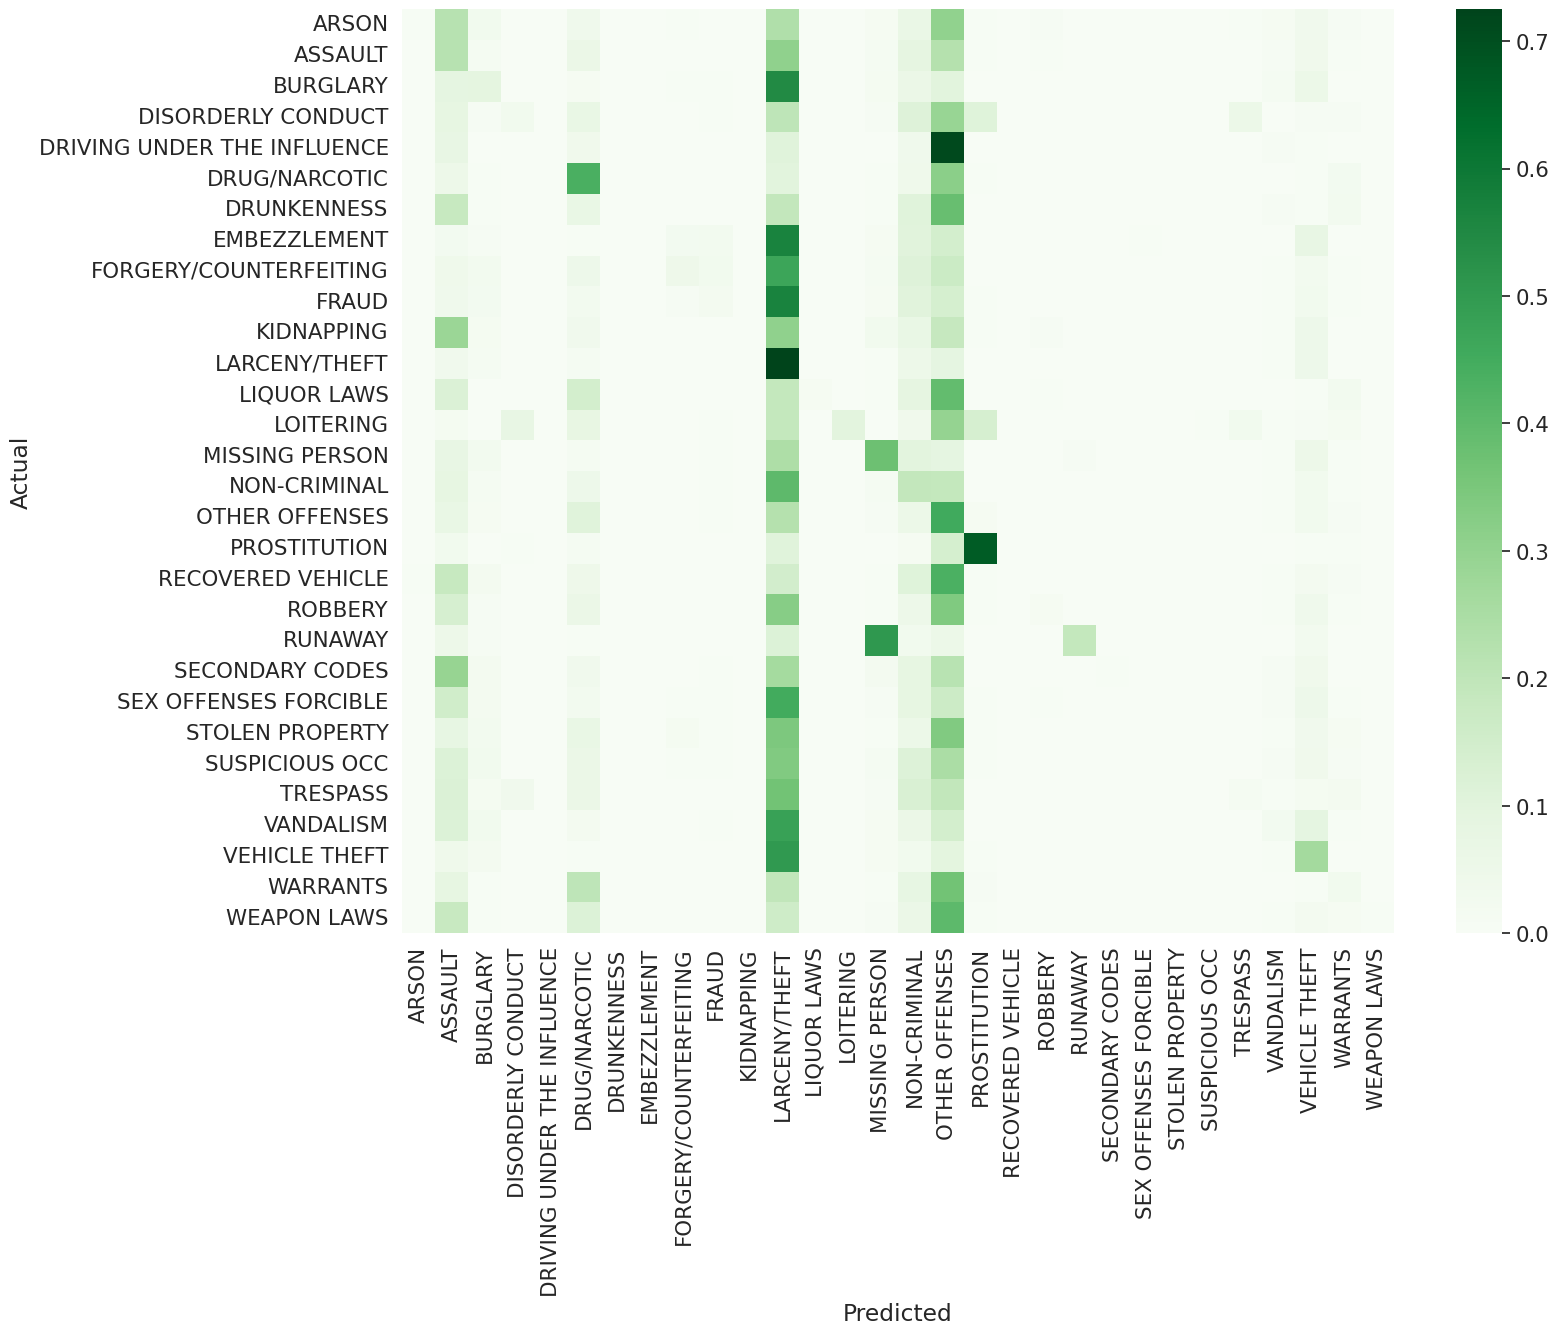

In [27]:
cnf_normalized = cnf_matrix / np.sum(cnf_matrix, axis=1).reshape(-1,1)


df_cm = pd.DataFrame(cnf_normalized, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (16,12))
plt.tight_layout()
sns.set(font_scale=1.4)  # for label size

# Plot the normalized confusion matrix
sns.heatmap(df_cm, cbar=True, cmap= "Greens", annot=False, fmt='.0f' #, annot_kws={"size": 13}
           )

In [28]:
import joblib
# Save the model
joblib.dump(model, 'models/xgboost/xgboost.pkl')

['models/random_forest/random_forest_model.pkl']